# Walmart_capstone_project

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import plotly.express as px
warnings.filterwarnings('ignore')

import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [4]:
df=pd.read_csv("D:/walmart.csv",encoding = 'utf-8')  # used for decoding encoded string in dataset

In [5]:
df["Unemployment"].max()

14.313

In [6]:
#convert date to datetime 
df['Date'] = pd.to_datetime(df['Date'] , dayfirst= True) # dayfirst=True means parses date with date first its default value is false

In [7]:
#set date column as index
df.set_index('Date' , inplace = True)

In [8]:
df

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      1    1643690.90             0        42.31       2.572   
2010-02-12      1    1641957.44             1        38.51       2.548   
2010-02-19      1    1611968.17             0        39.93       2.514   
2010-02-26      1    1409727.59             0        46.63       2.561   
2010-03-05      1    1554806.68             0        46.50       2.625   
...           ...           ...           ...          ...         ...   
2012-09-28     45     713173.95             0        64.88       3.997   
2012-10-05     45     733455.07             0        64.89       3.985   
2012-10-12     45     734464.36             0        54.47       4.000   
2012-10-19     45     718125.53             0        56.47       3.969   
2012-10-26     45     760281.43             0        58.85       3.882   

                   CPI  Unemployment  
Date                                  
2010-02-05  211.096358         8.106  
2010-02-12  211.242170         8.106  
2010-02-19  211.289143         8.106  
2010-02-26  211.319643         8.106  
2010-03-05  211.350143         8.106  
...                ...           ...  
2012-09-28  192.013558         8.684  
2012-10-05  192.170412         8.667  
2012-10-12  192.327265         8.667  
2012-10-19  192.330854         8.667  
2012-10-26  192.308899         8.667  

[6435 rows x 7 columns]

In [9]:
#Data Preprocessing


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6435 entries, 2010-02-05 to 2012-10-26
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Weekly_Sales  6435 non-null   float64
 2   Holiday_Flag  6435 non-null   int64  
 3   Temperature   6435 non-null   float64
 4   Fuel_Price    6435 non-null   float64
 5   CPI           6435 non-null   float64
 6   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 402.2 KB


In [11]:
#checking null
df.isnull().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [12]:
df.isna().sum()

Store           0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

In [13]:
#checking duplicates
df.duplicated().sum()

0

In [14]:
#Visulization

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


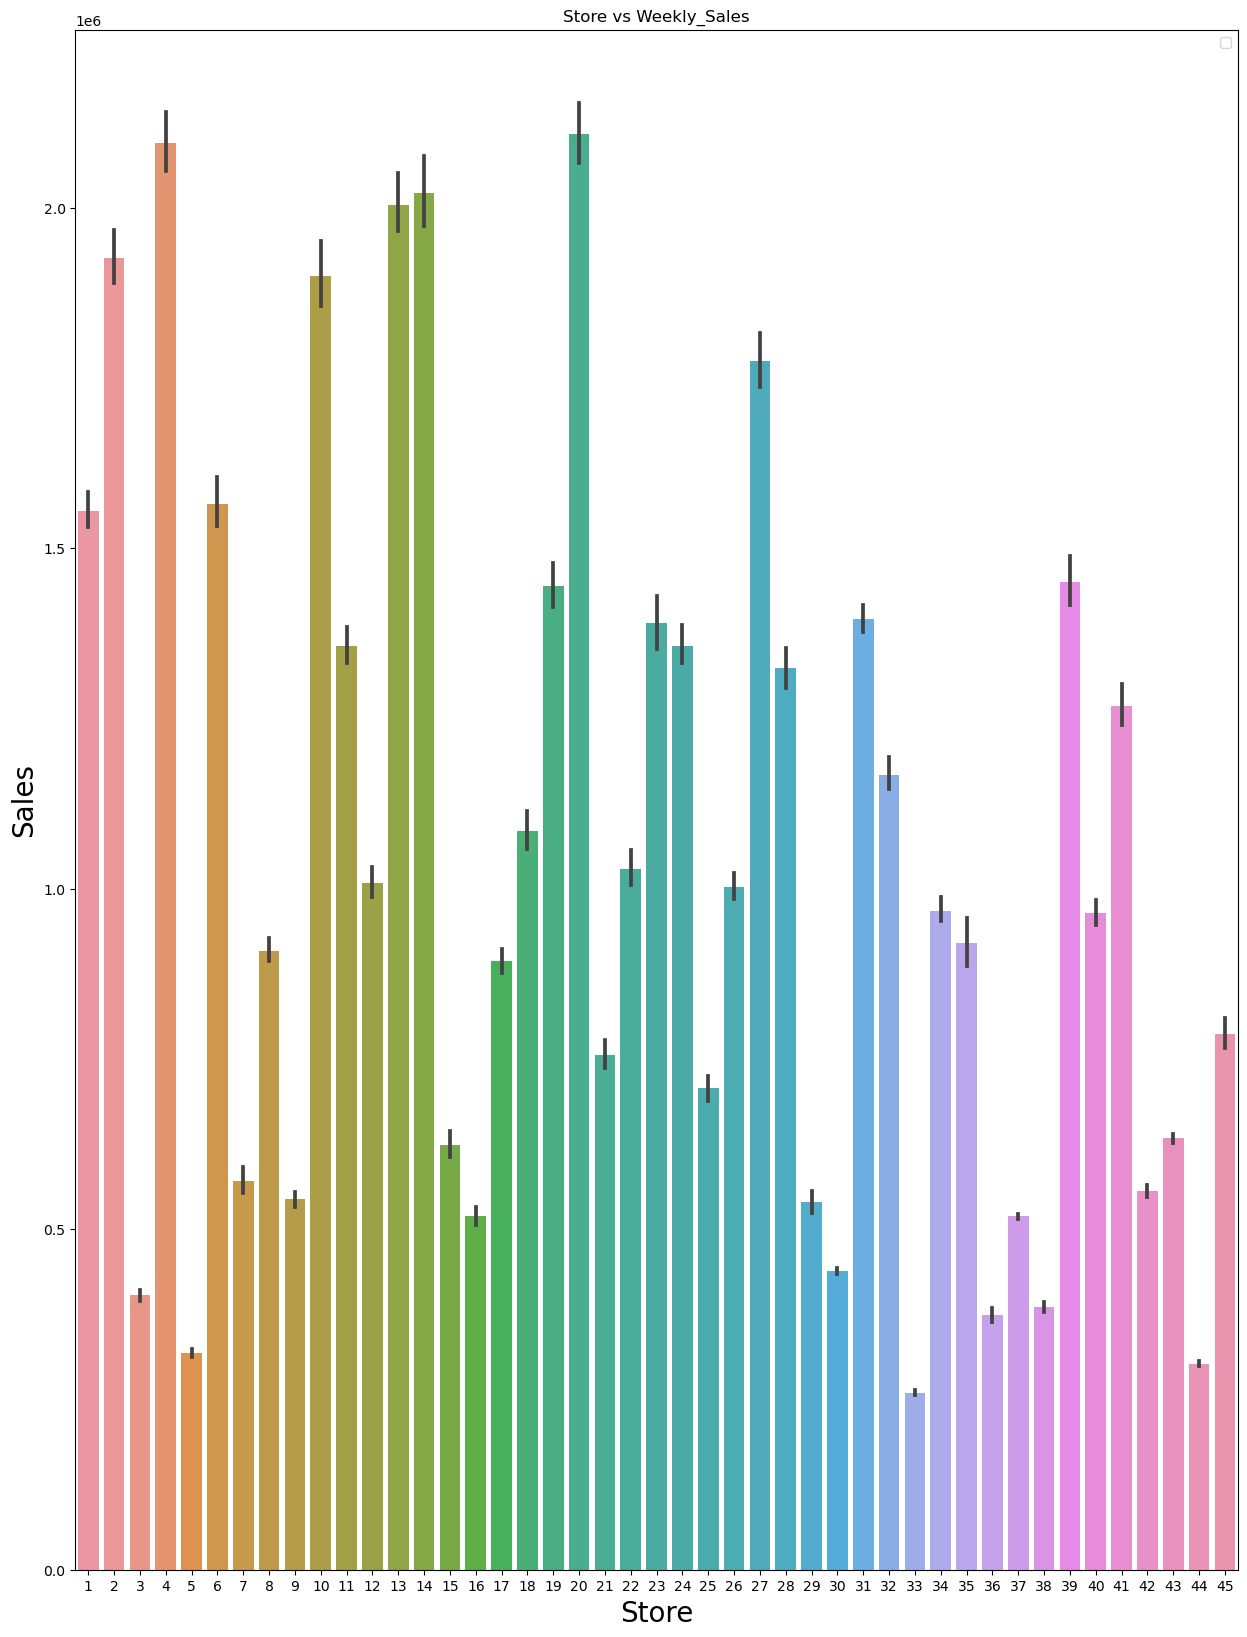

In [15]:
plt.figure(figsize=(15,20))
sns.barplot(x='Store',y='Weekly_Sales',data=df)
plt.ylabel('Sales',fontsize=20)
plt.xlabel('Store',fontsize=20)
plt.title("Store vs Weekly_Sales")
plt.legend()
plt.show()
#store 20 and 4 has highest weekly sales adn store 5,33, 44 has lowest weekly sales 

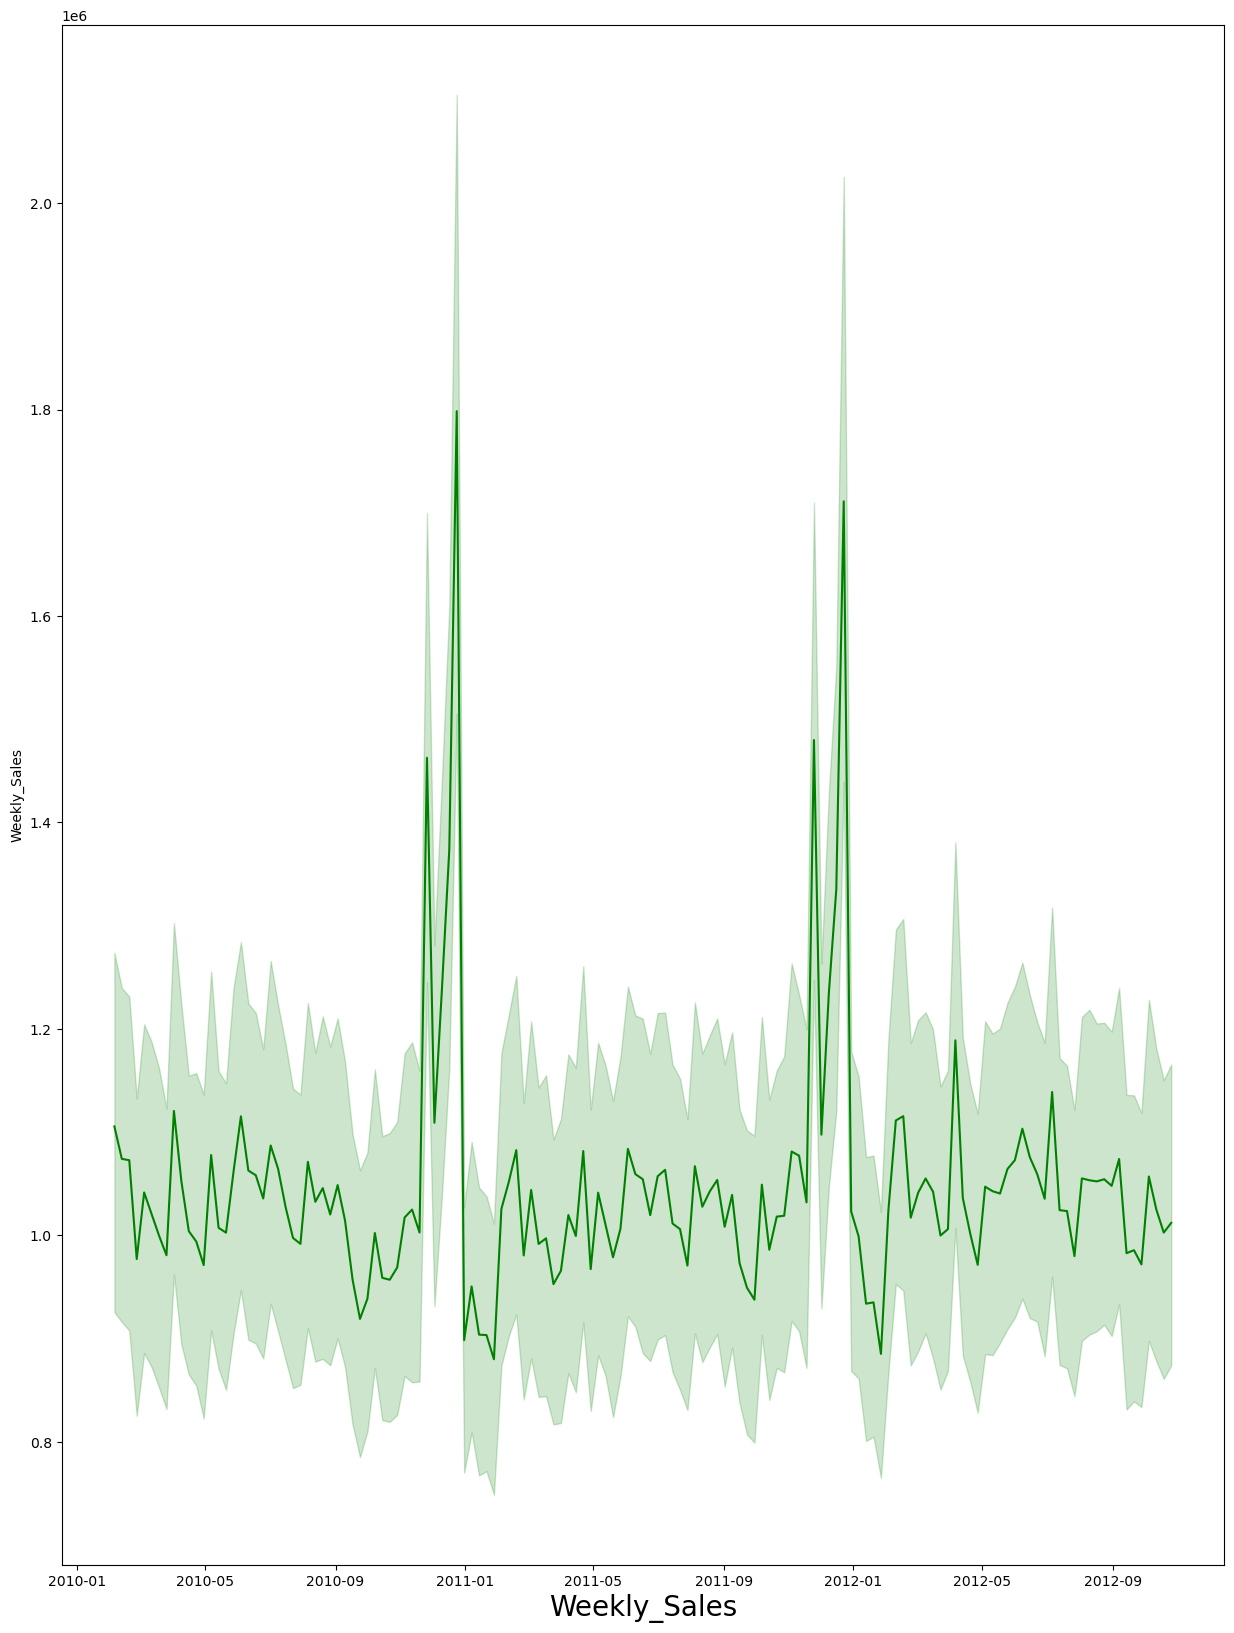

In [16]:
#Analyzing the trends , seasonlity and irregularity


plt.figure(figsize=(15,20))
sns.lineplot(df["Weekly_Sales"],color="green")
plt.xlabel("Weekly_Sales", fontsize='20')
plt.show()


#There is some trends and seasonlability present 

In [17]:
#relation between weekly sales and holidays
plt.figure(figsize = (20,10))

fig = px.strip(df, x="Weekly_Sales", y="Holiday_Flag", orientation="h", color="Store" , title = 'weekly sales vs holiday_flag')
fig.show()
#store 14,15,16 has highest sales in holiday_flag = 0 

<Figure size 2000x1000 with 0 Axes>

In [18]:
fig = px.scatter(df, x="Weekly_Sales", y="Temperature", color="Store",
                 title="Temperature vs weeklysales ")

fig.show()
#sales increases from 40 to 90

In [19]:
fig = px.scatter(df, x="Weekly_Sales", y="Unemployment", color="Store",
                 title="Unemployment vs weeklysales " )
fig.show()
#inverse realtion between Unemployment and Weekly_Sales

In [20]:
fig = px.histogram(df, x="Unemployment", y="Weekly_Sales", 
                   hover_data=df.columns , title =  " Unemployment vs weekly_sales")
fig.show()
#weekly sales increases when unemployemnt range between 6 to 10

In [21]:
fig = px.histogram(df, x="Weekly_Sales", y="CPI", 
                   hover_data=df.columns , title =  " cpi vs weekly_sales")
fig.show()
#weekly sale is highest when cpi is above 60k

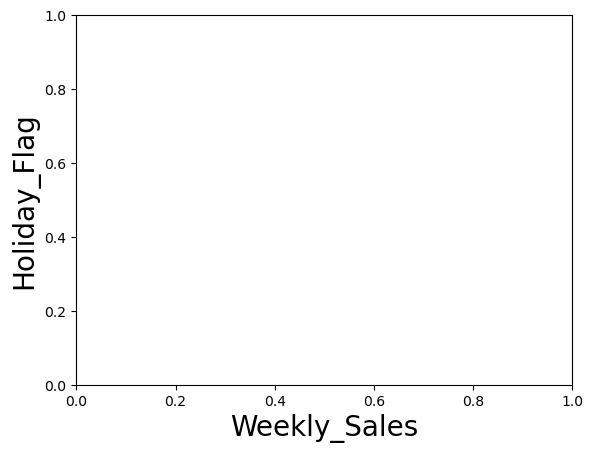

In [22]:
graph=px.strip(df, x="Weekly_Sales", y="Holiday_Flag")
plt.xlabel("Weekly_Sales",fontsize='20')
plt.ylabel("Holiday_Flag",fontsize='20')
graph.show()
#Holiday flag =0 has highest weekly sales

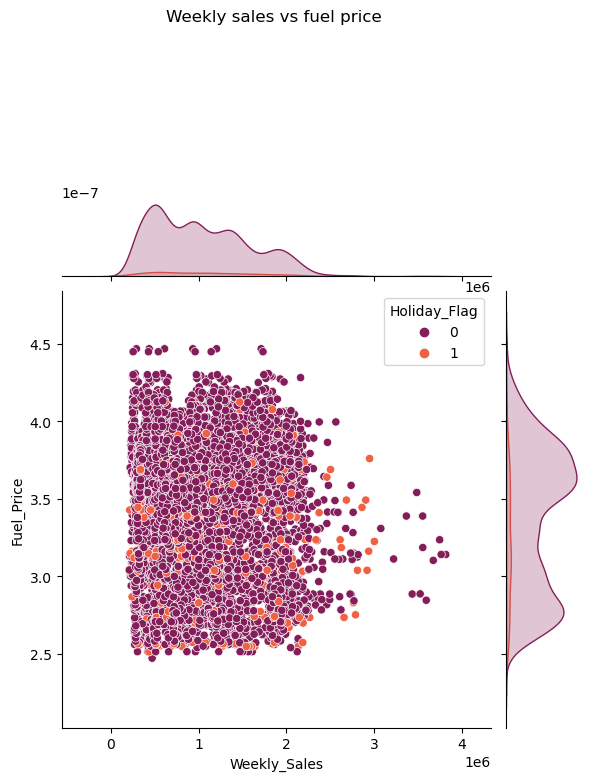

In [23]:
sns.jointplot(df, x="Weekly_Sales", y="Fuel_Price" ,hue='Holiday_Flag' ,palette = 'rocket')
plt.title ('Weekly sales vs fuel price ' , y = 1.6)
plt.show()

#as the fuel price increases weekly sales decreases 

# Store_1

In [24]:
#As data consist of sales with date and time so we are using Time Series model in which building and forecasting will be 
# done according storewise so we are selecing randomly 5 stores data and dropping other columns which are not useful

In [25]:
store_1=df[df["Store"]==3]
store_2=df[df["Store"]==11]
store_3=df[df["Store"]==23]
store_4=df[df["Store"]==27]
store_5=df[df["Store"]==34]

In [26]:
store_1.shape

(143, 7)

In [27]:
store_1

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05      3     461622.22             0        45.71       2.572   
2010-02-12      3     420728.96             1        47.93       2.548   
2010-02-19      3     421642.19             0        47.07       2.514   
2010-02-26      3     407204.86             0        52.05       2.561   
2010-03-05      3     415202.04             0        53.04       2.625   
...           ...           ...           ...          ...         ...   
2012-09-28      3     389813.02             0        77.46       3.666   
2012-10-05      3     443557.65             0        72.74       3.617   
2012-10-12      3     410804.39             0        70.31       3.601   
2012-10-19      3     424513.08             0        73.44       3.594   
2012-10-26      3     405432.70             0        74.66       3.506   

                   CPI  Unemployment  
Date                                  
2010-02-05  214.424881         7.368  
2010-02-12  214.574792         7.368  
2010-02-19  214.619887         7.368  
2010-02-26  214.647513         7.368  
2010-03-05  214.675139         7.368  
...                ...           ...  
2012-09-28  226.518093         6.334  
2012-10-05  226.721036         6.034  
2012-10-12  226.923979         6.034  
2012-10-19  226.968844         6.034  
2012-10-26  226.987364         6.034  

[143 rows x 7 columns]

In [28]:
#Using only one required column
weekly_sales = store_1[['Weekly_Sales']]
weekly_sales.shape

(143, 1)

In [29]:
#resample by week
weekly_sales = (weekly_sales.resample('1w').sum())
weekly_sales

Weekly_Sales
Date                    
2010-02-07     461622.22
2010-02-14     420728.96
2010-02-21     421642.19
2010-02-28     407204.86
2010-03-07     415202.04
...                  ...
2012-09-30     389813.02
2012-10-07     443557.65
2012-10-14     410804.39
2012-10-21     424513.08
2012-10-28     405432.70

[143 rows x 1 columns]

In [30]:
#according date differentiating weekly sales
df_new = weekly_sales.reset_index()
df_new = df_new.groupby('Date').sum()[['Weekly_Sales']]
df_new

Weekly_Sales
Date                    
2010-02-07     461622.22
2010-02-14     420728.96
2010-02-21     421642.19
2010-02-28     407204.86
2010-03-07     415202.04
...                  ...
2012-09-30     389813.02
2012-10-07     443557.65
2012-10-14     410804.39
2012-10-21     424513.08
2012-10-28     405432.70

[143 rows x 1 columns]

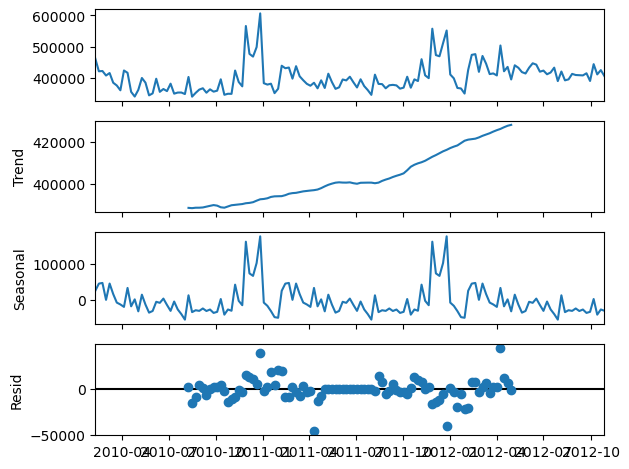

In [31]:
decomposition = sm.tsa.seasonal_decompose (df_new, model = 'additive')
decomposition.plot()
plt.show()


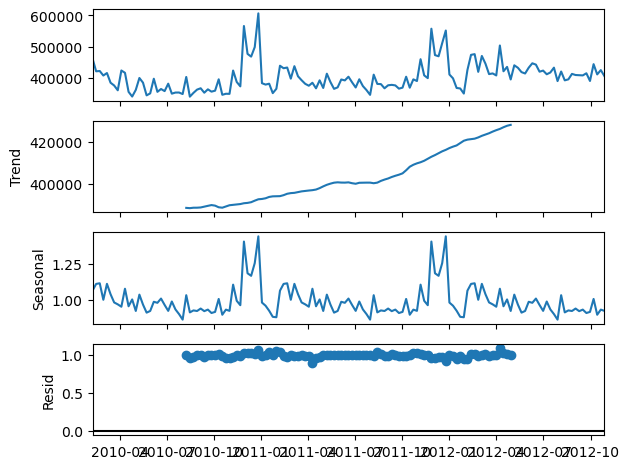

In [32]:
decomposition = sm.tsa.seasonal_decompose (df_new , model = 'multiplicative')
decomposition.plot()
plt.show()

In [33]:
mean = df_new.rolling(window=7).mean()
std = df_new.rolling(window=7).std()
print (mean , std)

             Weekly_Sales
Date                     
2010-02-07            NaN
2010-02-14            NaN
2010-02-21            NaN
2010-02-28            NaN
2010-03-07            NaN
...                   ...
2012-09-30  405175.890000
2012-10-07  412124.292857
2012-10-14  411889.252857
2012-10-21  414128.445714
2012-10-28  413728.870000

[143 rows x 1 columns]             Weekly_Sales
Date                    
2010-02-07           NaN
2010-02-14           NaN
2010-02-21           NaN
2010-02-28           NaN
2010-03-07           NaN
...                  ...
2012-09-30   9198.165398
2012-10-07  16008.474761
2012-10-14  16014.978155
2012-10-21  16602.382265
2012-10-28  16800.486612

[143 rows x 1 columns]


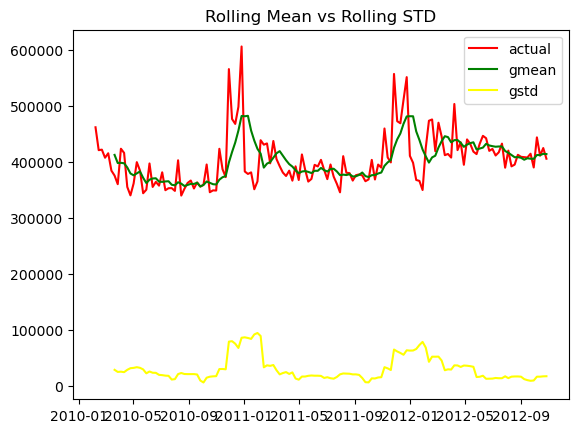

In [34]:
plt.plot(df_new , color = "red" , label = "actual")
rmean = plt.plot(mean , color = "green" , label = "gmean")
rstd = plt.plot(std , color = "yellow" , label = "gstd")
plt.legend()
plt.title("Rolling Mean vs Rolling STD")
plt.show()

In [35]:
# from above graph we come to know there is trend and seasionablity present in dataset looks data is not stationary

In [36]:
ad=adfuller(df_new["Weekly_Sales"])
pvalue=ad[1]
pvalue

0.03840926179831273

In [37]:
#Removing trend and seasonability

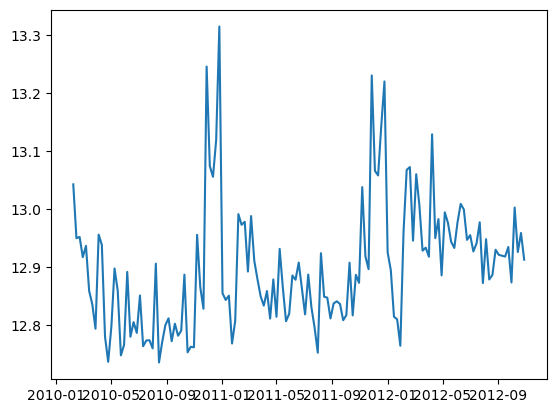

In [38]:
df_log = np.log(df_new)
plt.plot(df_log)

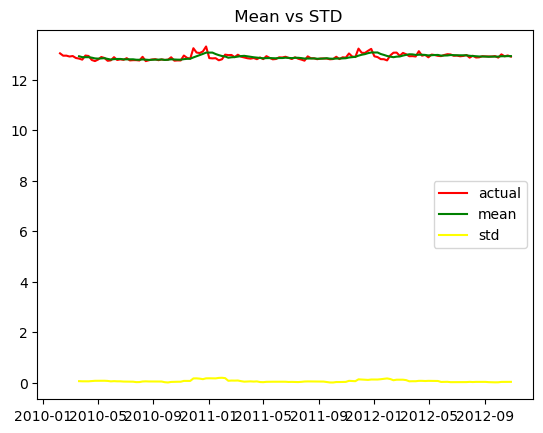

In [39]:
n_mean = df_log.rolling(window=7).mean()
n_std = df_log.rolling(window=7).std()

plt.plot(df_log , color = "red" , label = "actual")
mean = plt.plot(n_mean , color = "green" , label = "mean")
std = plt.plot(n_std , color = "yellow" , label = "std")
plt.legend()
plt.title(" Mean vs STD")
plt.show()

In [40]:
ad=adfuller(df_log["Weekly_Sales"])
pvalue=ad[1]
pvalue

0.2149409054885686

In [41]:

df_rolling_s1 = df_new - n_mean
df_rolling_s1.head(12)

#Remove NAN values
df_rolling_s1.dropna(inplace=True)
df_rolling_s1.head(10)

Weekly_Sales
Date                     
2010-03-21  375315.662539
2010-03-28  359936.378079
2010-04-04  423281.507211
2010-04-11  415857.389180
2010-04-18  354980.388783
2010-04-25  339963.807338
2010-05-02  361235.556138
2010-05-09  399311.017285
2010-05-16  384345.087912
2010-05-23  343750.347643

In [42]:
df_rolling_s1_new=df_rolling_s1-df_rolling_s1.shift()
df_rolling_s1_new.dropna(inplace=True)
df_rolling_s1_new

Weekly_Sales
Date                    
2010-03-28 -15379.284459
2010-04-04  63345.129132
2010-04-11  -7424.118031
2010-04-18 -60877.000397
2010-04-25 -15016.581445
...                  ...
2012-09-30 -24579.069269
2012-10-07  53744.613407
2012-10-14 -32753.259429
2012-10-21  13708.684625
2012-10-28 -19080.379018

[136 rows x 1 columns]

In [43]:
#now finally checking pvalue
ad=adfuller(df_rolling_s1_new["Weekly_Sales"])
pvalue=ad[1]
pvalue
#pvalue is too less than 0.05 now we can build model

1.3837927578804516e-09

In [44]:
train1=df_rolling_s1_new[:116]
test1=df_rolling_s1_new[116:]

In [45]:
!pip install pmdarima
from pmdarima import auto_arima

ERROR: Could not find a version that satisfies the requirement pmdarima (from versions: none)
ERROR: No matching distribution found for pmdarima


ModuleNotFoundError: No module named 'pmdarima'

In [ ]:
a=auto_arima(df_rolling_s1_new["Weekly_Sales"])
a.summary()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train1,order=(5,0,1),seasonal_order=(5,0,1,7))
mo_fit=model.fit()

In [ ]:
df_rolling_s1_new["predict"]=mo_fit.predict(start=len(train1),end=len(train1)+len(test1)-1)

In [ ]:
df_rolling_s1_new[["Weekly_Sales","predict"]].plot()

In [ ]:
forecasts= mo_fit.forecast(steps=30, alpha=0.05)  # 95% conf


l_series = pd.Series(forecasts)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train1, label='train')
plt.plot(test1, label='actual')
plt.plot(l_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

# Building model for store_2 

In [ ]:
store_2

In [ ]:
#Using only one required column
weekly_sales2 = store_2[['Weekly_Sales']]
weekly_sales2.shape

In [ ]:
#resample by week
weekly_sales2 = (weekly_sales2.resample('1w').sum())
weekly_sales2

In [ ]:
#according date differentiating weekly sales
df_new2 = weekly_sales2.reset_index()
df_new2 = df_new2.groupby('Date').sum()[['Weekly_Sales']]
df_new2

In [ ]:
decomposition = sm.tsa.seasonal_decompose (df_new2 , model = 'multiplicative')
decomposition.plot()
plt.show()

In [ ]:
mean = df_new2.rolling(window=7).mean()
std = df_new2.rolling(window=7).std()
print (mean , std)

In [ ]:
plt.plot(df_new2 , color = "red" , label = "actual")
rmean = plt.plot(mean , color = "green" , label = "gmean")
rstd = plt.plot(std , color = "yellow" , label = "gstd")
plt.legend()
plt.title("Rolling Mean vs Rolling STD")
plt.show()

In [ ]:
# from above graph we come to know there is trend and seasionablity present in dataset looks data is not stationary

In [ ]:
ad=adfuller(df_new2["Weekly_Sales"])
pvalue=ad[1]
pvalue

In [ ]:
#Removing trend and seasonability

In [ ]:
df_log2 = np.log(df_new2)
plt.plot(df_log2)

In [ ]:
n_mean = df_log2.rolling(window=7).mean()
n_std = df_log2.rolling(window=7).std()

plt.plot(df_log2 , color = "red" , label = "actual")
mean = plt.plot(n_mean , color = "green" , label = "mean")
std = plt.plot(n_std , color = "yellow" , label = "std")
plt.legend()
plt.title(" Mean vs STD")
plt.show()

In [ ]:
ad=adfuller(df_log2["Weekly_Sales"])
pvalue=ad[1]
pvalue

In [ ]:

df_rolling_s2 = df_new2 - n_mean
df_rolling_s2.head(12)

#Remove NAN values
df_rolling_s2.dropna(inplace=True)
df_rolling_s2.head(10)

In [ ]:
df_rolling_s2_new=df_rolling_s2-df_rolling_s2.shift()
df_rolling_s2_new.dropna(inplace=True)
df_rolling_s2_new

In [ ]:
#now finally checking pvalue
ad=adfuller(df_rolling_s2_new["Weekly_Sales"])
pvalue=ad[1]
pvalue
#pvalue is too less than 0.05 now we can build model

In [ ]:
train=df_rolling_s2_new[:116]
test=df_rolling_s2_new[116:]

In [ ]:
a=auto_arima(df_rolling_s2_new["Weekly_Sales"])
a.summary()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(4,0,3),seasonal_order=(4,0,3,7))
mo_fit=model.fit()

In [ ]:
df_rolling_s2_new["predict"]=mo_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [ ]:
df_rolling_s2_new[["Weekly_Sales","predict"]].plot()

In [ ]:
forecasts= mo_fit.forecast(steps=30, alpha=0.05)  # 95% conf


l_series = pd.Series(forecasts)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='train')
plt.plot(test, label='actual')
plt.plot(l_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

# Store_3

In [ ]:
store_3

In [ ]:
#Using only one required column
weekly_sales3 = store_3[['Weekly_Sales']]
weekly_sales3.shape

In [ ]:
#resample by week
weekly_sales3 = (weekly_sales3.resample('1w').sum())
weekly_sales3

In [ ]:
#according date differentiating weekly sales
df_new3 = weekly_sales3.reset_index()
df_new3 = df_new3.groupby('Date').sum()[['Weekly_Sales']]
df_new3

In [ ]:
decomposition = sm.tsa.seasonal_decompose (df_new3 , model = 'multiplicative')
decomposition.plot()
plt.show()

In [ ]:
mean = df_new3.rolling(window=7).mean()
std = df_new3.rolling(window=7).std()
print (mean , std)

In [ ]:
plt.plot(df_new3 , color = "red" , label = "actual")
rmean = plt.plot(mean , color = "green" , label = "gmean")
rstd = plt.plot(std , color = "yellow" , label = "gstd")
plt.legend()
plt.title("Rolling Mean vs Rolling STD")
plt.show()

In [ ]:
# from above graph we come to know there is trend and seasionablity present in dataset looks data is not stationary

In [ ]:
ad=adfuller(df_new3["Weekly_Sales"])
pvalue=ad[1]
pvalue

In [23]:
#Removing trend and seasonability

In [24]:
df_log3 = np.log(df_new3)
plt.plot(df_log3)

NameError: name 'df_new3' is not defined

In [25]:
n_mean = df_log3.rolling(window=7).mean()
n_std = df_log3.rolling(window=7).std()

plt.plot(df_log3 , color = "red" , label = "actual")
mean = plt.plot(n_mean , color = "green" , label = "mean")
std = plt.plot(n_std , color = "yellow" , label = "std")
plt.legend()
plt.title(" Mean vs STD")
plt.show()

NameError: name 'df_log3' is not defined

In [26]:
ad=adfuller(df_log3["Weekly_Sales"])
pvalue=ad[1]
pvalue

NameError: name 'adfuller' is not defined

In [27]:

df_rolling_s3 = df_log3 - n_mean
df_rolling_s3.head(12)

#Remove NAN values
df_rolling_s3.dropna(inplace=True)
df_rolling_s3.head(10)

NameError: name 'df_log3' is not defined

In [28]:
df_rolling_s3_new=df_rolling_s3-df_rolling_s3.shift()
df_rolling_s3_new.dropna(inplace=True)
df_rolling_s3_new

NameError: name 'df_rolling_s3' is not defined

In [29]:
#now finally checking pvalue
ad=adfuller(df_rolling_s3_new["Weekly_Sales"])
pvalue=ad[1]
pvalue
#pvalue is too less than 0.05 now we can build model

NameError: name 'adfuller' is not defined

In [30]:
train=df_rolling_s3_new[:116]
test=df_rolling_s3_new[116:]

NameError: name 'df_rolling_s3_new' is not defined

In [31]:
a=auto_arima(df_rolling_s3_new["Weekly_Sales"])
a.summary()

NameError: name 'auto_arima' is not defined

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(2,0,3),seasonal_order=(2,0,3,7))
mo_fit=model.fit()

In [586]:
df_rolling_s3_new["predict"]=mo_fit.predict(start=len(train),end=len(train)+len(test)-1)

<Axes: xlabel='Date'>

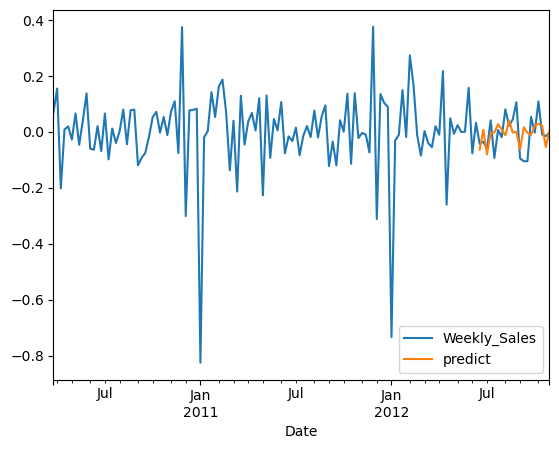

In [587]:
df_rolling_s3_new[["Weekly_Sales","predict"]].plot()

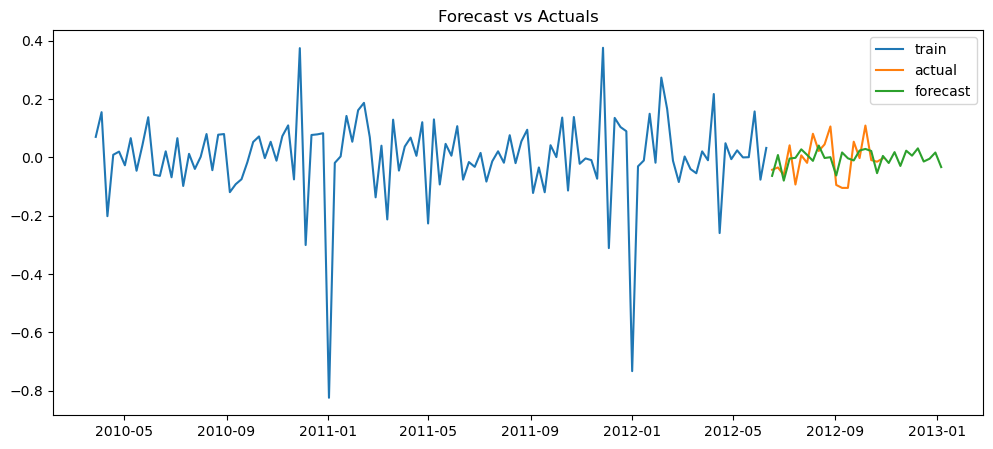

In [588]:
forecasts= mo_fit.forecast(steps=30, alpha=0.05)  # 95% conf


l_series = pd.Series(forecasts)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='train')
plt.plot(test, label='actual')
plt.plot(l_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

# Store_4

In [676]:
store_4

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05     27    1874289.79             0        27.19       2.954   
2010-02-12     27    1745362.72             1        29.81       2.940   
2010-02-19     27    1945070.33             0        32.44       2.909   
2010-02-26     27    1390934.27             0        36.00       2.910   
2010-03-05     27    1313729.72             0        38.07       2.919   
...           ...           ...           ...          ...         ...   
2012-09-28     27    1540687.63             0        64.92       4.158   
2012-10-05     27    1591816.88             0        64.50       4.151   
2012-10-12     27    1660081.29             0        55.40       4.186   
2012-10-19     27    1620374.24             0        56.53       4.153   
2012-10-26     27    1703047.74             0        58.99       4.071   

                   CPI  Unemployment  
Date                                  
2010-02-05  135.352461         8.237  
2010-02-12  135.411308         8.237  
2010-02-19  135.465778         8.237  
2010-02-26  135.519519         8.237  
2010-03-05  135.573260         8.237  
...                ...           ...  
2012-09-28  142.765750         8.239  
2012-10-05  142.851683         8.000  
2012-10-12  142.937617         8.000  
2012-10-19  142.863363         8.000  
2012-10-26  142.762411         8.000  

[143 rows x 7 columns]

In [679]:
#Using only one required column
weekly_sales4 = store_4[['Weekly_Sales']]
weekly_sales4.shape

(143, 1)

In [680]:
#resample by week
weekly_sales4 = (weekly_sales4.resample('1w').sum())
weekly_sales4

Weekly_Sales
Date                    
2010-02-07    1874289.79
2010-02-14    1745362.72
2010-02-21    1945070.33
2010-02-28    1390934.27
2010-03-07    1313729.72
...                  ...
2012-09-30    1540687.63
2012-10-07    1591816.88
2012-10-14    1660081.29
2012-10-21    1620374.24
2012-10-28    1703047.74

[143 rows x 1 columns]

In [681]:
#according date differentiating weekly sales
df_new4 = weekly_sales4.reset_index()
df_new4 = df_new4.groupby('Date').sum()[['Weekly_Sales']]
df_new4

Weekly_Sales
Date                    
2010-02-07    1874289.79
2010-02-14    1745362.72
2010-02-21    1945070.33
2010-02-28    1390934.27
2010-03-07    1313729.72
...                  ...
2012-09-30    1540687.63
2012-10-07    1591816.88
2012-10-14    1660081.29
2012-10-21    1620374.24
2012-10-28    1703047.74

[143 rows x 1 columns]

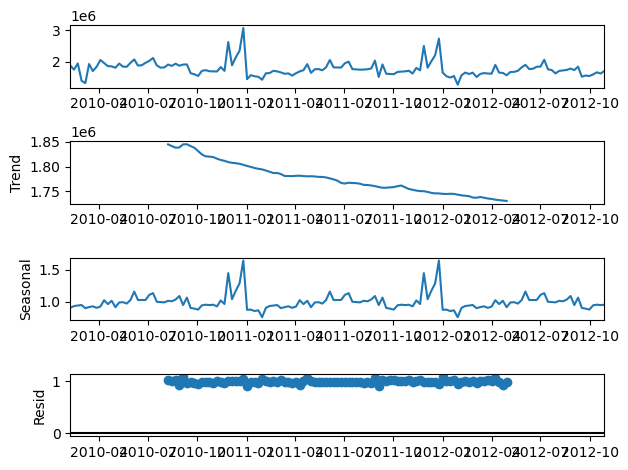

In [682]:
decomposition = sm.tsa.seasonal_decompose (df_new4 , model = 'multiplicative')
decomposition.plot()
plt.show()

In [683]:
mean = df_new4.rolling(window=7).mean()
std = df_new4.rolling(window=7).std()
print (mean , std)

            Weekly_Sales
Date                    
2010-02-07           NaN
2010-02-14           NaN
2010-02-21           NaN
2010-02-28           NaN
2010-03-07           NaN
...                  ...
2012-09-30  1.672350e+06
2012-10-07  1.651847e+06
2012-10-14  1.634652e+06
2012-10-21  1.618715e+06
2012-10-28  1.599014e+06

[143 rows x 1 columns]              Weekly_Sales
Date                     
2010-02-07            NaN
2010-02-14            NaN
2010-02-21            NaN
2010-02-28            NaN
2010-03-07            NaN
...                   ...
2012-09-30  130057.662435
2012-10-07  129785.238139
2012-10-14  117279.186119
2012-10-21  109154.580337
2012-10-28   66448.878886

[143 rows x 1 columns]


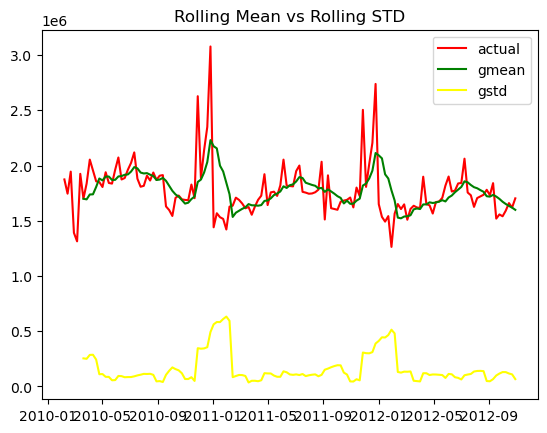

In [684]:
plt.plot(df_new4 , color = "red" , label = "actual")
rmean = plt.plot(mean , color = "green" , label = "gmean")
rstd = plt.plot(std , color = "yellow" , label = "gstd")
plt.legend()
plt.title("Rolling Mean vs Rolling STD")
plt.show()

In [685]:
# from above graph we come to know there is trend and seasionablity present in dataset looks data is not stationary

In [686]:
ad=adfuller(df_new4["Weekly_Sales"])
pvalue=ad[1]
pvalue

6.821221055631735e-06

In [687]:
#Removing trend and seasonability

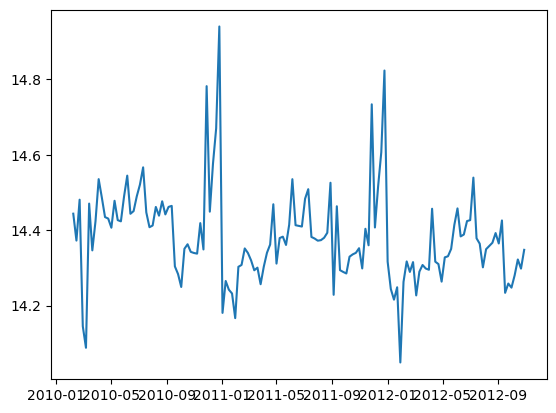

In [688]:
df_log4 = np.log(df_new4)
plt.plot(df_log4)

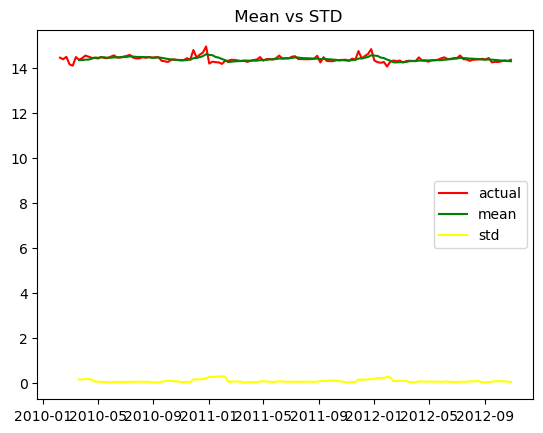

In [689]:
n_mean = df_log4.rolling(window=7).mean()
n_std = df_log4.rolling(window=7).std()

plt.plot(df_log4 , color = "red" , label = "actual")
mean = plt.plot(n_mean , color = "green" , label = "mean")
std = plt.plot(n_std , color = "yellow" , label = "std")
plt.legend()
plt.title(" Mean vs STD")
plt.show()

In [690]:
ad=adfuller(df_log4["Weekly_Sales"])
pvalue=ad[1]
pvalue

3.78057257507283e-06

In [667]:

df_rolling_s4 = df_log4 - n_mean
df_rolling_s4.head(12)

#Remove NAN values
df_rolling_s4.dropna(inplace=True)
df_rolling_s4.head(10)

Weekly_Sales
Date                    
2010-03-21      0.011095
2010-03-28      0.090969
2010-04-04      0.179499
2010-04-11      0.129752
2010-04-18      0.036855
2010-04-25     -0.015998
2010-05-02     -0.031110
2010-05-09      0.021475
2010-05-16     -0.030276
2010-05-23     -0.017488

In [691]:
#now finally checking pvalue
ad=adfuller(df_rolling_s4["Weekly_Sales"])
pvalue=ad[1]
pvalue
#pvalue is too less than 0.05 now we can build model

8.321964946536666e-06

In [692]:
train=df_rolling_s4[:116]
test=df_rolling_s4[116:]

In [693]:
a=auto_arima(df_rolling_s4["Weekly_Sales"])
a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  137
Model:               SARIMAX(1, 0, 5)   Log Likelihood                 141.412
Date:                Sat, 14 Oct 2023   AIC                           -266.825
Time:                        22:40:13   BIC                           -243.465
Sample:                    03-21-2010   HQIC                          -257.332
                         - 10-28-2012                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.0007      0.001     -0.708      0.479      -0.003       0.001
ar.L1          0.6216      0.124      5.031      0.000       0.379       0.864
ma.L1         -0.3843      0.194     -1.983      0.047      -0.764      -0.004
ma.L2         -0.0430      0.094     -0.456      0.648      -0.228       0.142
ma.L3         -0.1111      0.082     -1.362      0.173      -0.271       0.049
ma.L4          0.1288      0.065      1.990      0.047       0.002       0.256
ma.L5         -0.5371      0.093     -5.763      0.000      -0.720      -0.354
sigma2         0.0073      0.001      8.727      0.000       0.006       0.009
===================================================================================
Ljung-Box (L1) (Q):                   0.15   Jarque-Bera (JB):                72.43
Prob(Q):                              0.69   Prob(JB):                         0.00
Heteroskedasticity (H):               0.58   Skew:                             0.54
Prob(H) (two-sided):                  0.07   Kurtosis:                         6.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [694]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(1,0,5),seasonal_order=(1,0,5,7))
mo_fit=model.fit()

C:\Users\Darshan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

C:\Users\Darshan\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning:

No frequency information was provided, so inferred frequency W-SUN will be used.

C:\Users\Darshan\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.

C:\Users\Darshan\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [695]:
df_rolling_s4["predict"]=mo_fit.predict(start=len(train),end=len(train)+len(test)-1)

<Axes: xlabel='Date'>

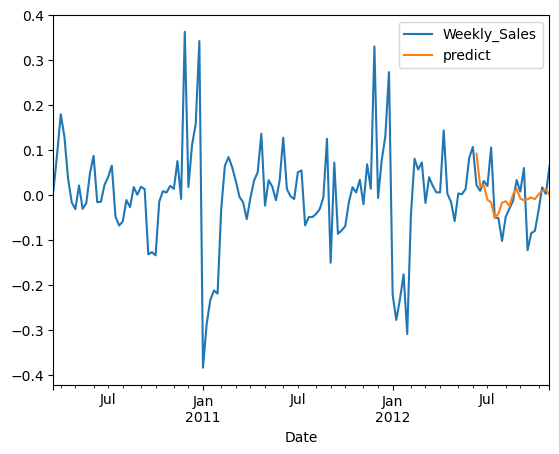

In [696]:
df_rolling_s4[["Weekly_Sales","predict"]].plot()

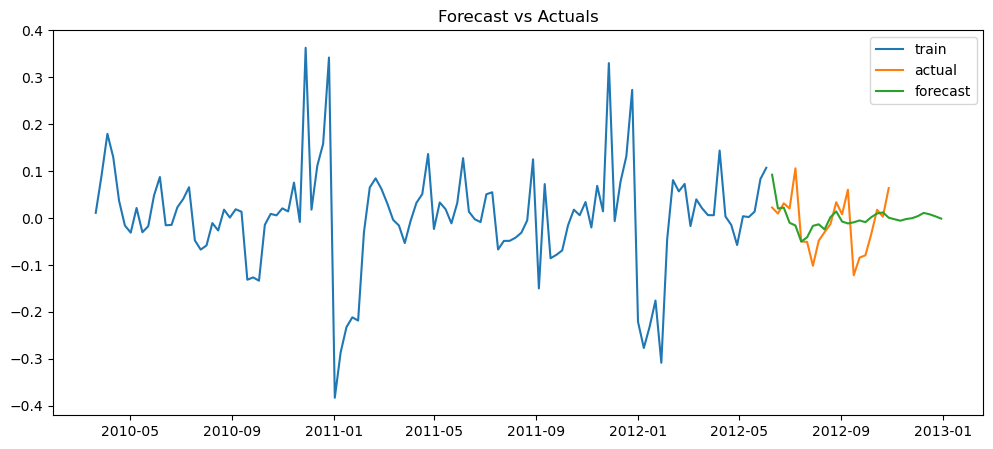

In [697]:
forecasts= mo_fit.forecast(steps=30, alpha=0.05)  # 95% conf


l_series = pd.Series(forecasts)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='train')
plt.plot(test, label='actual')
plt.plot(l_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

# Store_5


In [61]:
store_5

Store  Weekly_Sales  Holiday_Flag  Temperature  Fuel_Price  \
Date                                                                     
2010-02-05     34     956228.96             0        35.44       2.598   
2010-02-12     34     994610.99             1        36.13       2.573   
2010-02-19     34     983963.07             0        38.36       2.540   
2010-02-26     34     905756.13             0        37.28       2.590   
2010-03-05     34     918295.79             0        42.65       2.654   
...           ...           ...           ...          ...         ...   
2012-09-28     34     928629.31             0        67.06       3.666   
2012-10-05     34     968896.68             0        65.41       3.620   
2012-10-12     34     948613.39             0        59.94       3.603   
2012-10-19     34     963516.28             0        58.47       3.610   
2012-10-26     34     956987.81             0        57.95       3.514   

                   CPI  Unemployment  
Date                                  
2010-02-05  126.442065         9.521  
2010-02-12  126.496258         9.521  
2010-02-19  126.526286         9.521  
2010-02-26  126.552286         9.521  
2010-03-05  126.578286         9.521  
...                ...           ...  
2012-09-28  131.043000         9.285  
2012-10-05  131.075667         8.839  
2012-10-12  131.108333         8.839  
2012-10-19  131.149968         8.839  
2012-10-26  131.193097         8.839  

[143 rows x 7 columns]

In [64]:
#Using only one required column
weekly_sales5 = store_5[['Weekly_Sales']]
weekly_sales5.shape

(143, 1)

In [65]:
#resample by week
weekly_sales5 = (weekly_sales5.resample('1w').sum())
weekly_sales5

Weekly_Sales
Date                    
2010-02-07     956228.96
2010-02-14     994610.99
2010-02-21     983963.07
2010-02-28     905756.13
2010-03-07     918295.79
...                  ...
2012-09-30     928629.31
2012-10-07     968896.68
2012-10-14     948613.39
2012-10-21     963516.28
2012-10-28     956987.81

[143 rows x 1 columns]

In [66]:
#according date differentiating weekly sales
df_new5 = weekly_sales5.reset_index()
df_new5 = df_new5.groupby('Date').sum()[['Weekly_Sales']]
df_new5

Weekly_Sales
Date                    
2010-02-07     956228.96
2010-02-14     994610.99
2010-02-21     983963.07
2010-02-28     905756.13
2010-03-07     918295.79
...                  ...
2012-09-30     928629.31
2012-10-07     968896.68
2012-10-14     948613.39
2012-10-21     963516.28
2012-10-28     956987.81

[143 rows x 1 columns]

In [67]:
decomposition = sm.tsa.seasonal_decompose (df_new5 , model = 'multiplicative')
decomposition.plot()
plt.show()

NameError: name 'sm' is not defined

In [ ]:
mean = df_new5.rolling(window=7).mean()
std = df_new5.rolling(window=7).std()
print (mean , std)

In [ ]:
plt.plot(df_new5 , color = "red" , label = "actual")
rmean = plt.plot(mean , color = "green" , label = "gmean")
rstd = plt.plot(std , color = "yellow" , label = "gstd")
plt.legend()
plt.title("Rolling Mean vs Rolling STD")
plt.show()

In [ ]:
# from above graph we come to know there is trend and seasionablity present in dataset looks data is not stationary

In [ ]:
ad=adfuller(df_new5["Weekly_Sales"])
pvalue=ad[1]
pvalue

In [ ]:
#Removing trend and seasonability

In [ ]:
df_log5 = np.log(df_new5)
plt.plot(df_log5)

In [ ]:
n_mean = df_log5.rolling(window=7).mean()
n_std = df_log5.rolling(window=7).std()

plt.plot(df_log5 , color = "red" , label = "actual")
mean = plt.plot(n_mean , color = "green" , label = "mean")
std = plt.plot(n_std , color = "yellow" , label = "std")
plt.legend()
plt.title(" Mean vs STD")
plt.show()

In [ ]:
ad=adfuller(df_log5["Weekly_Sales"])
pvalue=ad[1]
pvalue

In [ ]:

df_rolling_s5 = df_log5 - n_mean
df_rolling_s5.head(12)

#Remove NAN values
df_rolling_s5.dropna(inplace=True)
df_rolling_s5.head(10)

In [ ]:
#now finally checking pvalue
ad=adfuller(df_rolling_s5["Weekly_Sales"])
pvalue=ad[1]
pvalue
#pvalue is too less than 0.05 now we can build model

In [ ]:
train=df_rolling_s5[:116]
test=df_rolling_s5[116:]

In [ ]:
a=auto_arima(df_rolling_s5["Weekly_Sales"])
a.summary()

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model=SARIMAX(train,order=(2,0,5),seasonal_order=(2,0,5,7))
mo_fit=model.fit()

In [ ]:
df_rolling_s5["predict"]=mo_fit.predict(start=len(train),end=len(train)+len(test)-1)

In [ ]:
df_rolling_s5[["Weekly_Sales","predict"]].plot()

In [ ]:
forecasts= mo_fit.forecast(steps=30, alpha=0.05)  # 95% conf


l_series = pd.Series(forecasts)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='train')
plt.plot(test, label='actual')
plt.plot(l_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend()
plt.show()

In [ ]:
df=pd.read_csv("/content/walmart.csv",encoding='UTF-8')

In [ ]:
#Differentiating the stores
s_1=df[df["Store"]==3]
s_2=df[df["Store"]==11]
s_3=df[df["Store"]==23]
s_4=df[df["Store"]==27]
s_5=df[df["Store"]==34]



In [ ]:
s1_new=s_1[["Date","Weekly_Sales"]]
s2_new=s_2[["Date","Weekly_Sales"]]
s3_new=s_3[["Date","Weekly_Sales"]]
s4_new=s_4[["Date","Weekly_Sales"]]
s5_new=s_5[["Date","Weekly_Sales"]]


In [ ]:
s1_new=s1_new.groupby("Date").sum("Weekly_Sales").reset_index()

s1_new

In [ ]:
s2_new=s2_new.groupby("Date").sum("Weekly_Sales").reset_index()
s3_new=s3_new.groupby("Date").sum("Weekly_Sales").reset_index()
s4_new=s4_new.groupby("Date").sum("Weekly_Sales").reset_index()
s5_new=s5_new.groupby("Date").sum("Weekly_Sales").reset_index()


In [ ]:
#Facebook library takes input column in ds and y so we are renaming the column name
s1_new.rename(columns={"Date":"ds","Weekly_Sales":"y"},inplace=True)


In [ ]:
s2_new.rename(columns={"Date":"ds","Weekly_Sales":"y"},inplace=True)
s3_new.rename(columns={"Date":"ds","Weekly_Sales":"y"},inplace=True)
s4_new.rename(columns={"Date":"ds","Weekly_Sales":"y"},inplace=True)
s5_new.rename(columns={"Date":"ds","Weekly_Sales":"y"},inplace=True)


In [ ]:
!pip install prophet
from prophet import Prophet

In [ ]:
model1=Prophet(interval_width=0.95) #95 confidence interval
model1.fit(s1_new)

In [ ]:
#now we creating future date frame for future date result
future1=model1.make_future_dataframe(periods=21)

In [ ]:
1#now forecasting
forcast1=model1.predict(future1)
forcast1[["ds","yhat","yhat_lower","yhat_upper"]]
model1.plot(forcast1)

In [ ]:
#store_2

model2=Prophet(interval_width=0.95) #95 confidence interval
model2.fit(s2_new)
future2=model2.make_future_dataframe(periods=21)
forcast2=model2.predict(future2)
forcast2[["ds","yhat","yhat_lower","yhat_upper"]]
model1.plot(forcast2)

In [ ]:
#store_3


model3=Prophet(interval_width=0.95) #95 confidence interval
model3.fit(s3_new)
future3=model3.make_future_dataframe(periods=21)
forcast3=model3.predict(future3)
forcast3[["ds","yhat","yhat_lower","yhat_upper"]]
model1.plot(forcast3)

In [ ]:
#store_4

model4=Prophet(interval_width=0.95) #95 confidence interval
model4.fit(s4_new)
future4=model4.make_future_dataframe(periods=21)
forcast4=model4.predict(future4)
forcast4[["ds","yhat","yhat_lower","yhat_upper"]]
model1.plot(forcast4)



In [ ]:
#store_5



model5=Prophet(interval_width=0.95) #95 confidence interval
model5.fit(s5_new)
future5=model5.make_future_dataframe(periods=21)
forcast5=model5.predict(future5)
forcast5[["ds","yhat","yhat_lower","yhat_upper"]]
model1.plot(forcast5)





In [ ]:
https://colab.research.google.com/drive/1dloeSMLSMI6MI_ea9P0MU6CdAeKFFDTf?usp=sharing